In [381]:
%pip install keras_preprocessing
%pip install matplotlib
%pip install idx2numpy
%pip install pillow
%pip install tensorflow
%pip install tensorflow==2.12.0


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [382]:
!pip install ipykernel

In [383]:

%pip install manim
# %pip install IPython --upgrade
%pip install colour
# %%python -m pip install --upgrade pip
%pip install tensorflow
%pip install matplotlib
%pip install tensorflow.keras

  Using cached manim-0.19.0-py3-none-any.whl.metadata (11 kB)
  Using cached av-13.1.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Using cached beautifulsoup4-4.13.4-py3-none-any.whl.metadata (3.8 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached cloup-3.0.7-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached isosurfaces-0.1.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached manimpango-0.6.0.tar.gz (4.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [28 lines of output]
      Package 'pangocairo' was not found
      Traceback (most recent call last):
        File "<string>", line 137, in check_min_version
        File "/usr/lib64/python3.11/subprocess.py", line 413, in check_call
          raise CalledProcessError(retcode, cmd)
      subprocess.

In [384]:
from keras_preprocessing import image as img
import os
from matplotlib import pyplot as plt
import idx2numpy
import keras_preprocessing
import tensorflow as tf
import numpy as np
import keras

In [385]:
!python3 -m pip install --upgrade pip

In [386]:
os.system("rm ./simulation/I.txt")

0

In [387]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [388]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

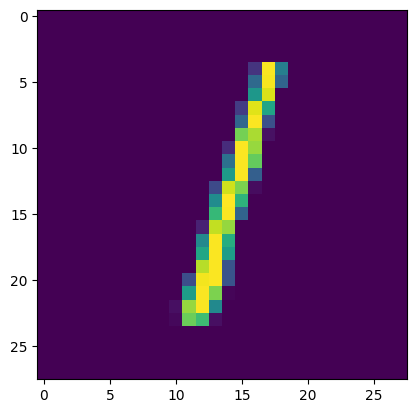

In [389]:
array = idx2numpy.convert_from_file(path)[2]
plt.imshow(array)

In [390]:

k = 0
l= 0

for i in array:
    for j in i:
        strtmp = f'{hex(int((j/255)*2**3))[2:]}'
        strtmp2 = '0'*(2-len(strtmp))+strtmp+' '
        f.write(strtmp2)
        # print(f'{strtmp2}',end='  ')
    f.write("\n")
    # print("\n")
f.close()

In [391]:
def concat(n):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    integ = ('0'*(16-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int(int("0b"+integ,2)/16)
    if(str(integ[0])=='1'):

        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -int((int("0b"+integ,2)+1)/16)
    # print(integ,'h')

    return [a]

In [392]:
keras.__version__

'2.12.0'

In [393]:
import keras

In [394]:
modelo_dig = keras.models.load_model("/home/valmir.silva/2CC/ConvolutionMatrixVerilog/model_network/okkk.h5")

In [395]:
modelo_dig.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 2)         52        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 2)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 4)         76        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [396]:
# !sudo apt-get install graphviz

In [397]:
!pip install pydot
!pip install pydotplus
!pip install graphviz
from keras.utils import plot_model

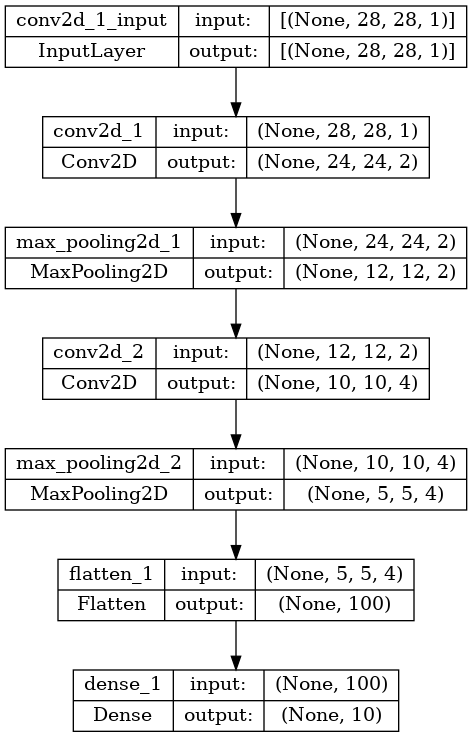

In [398]:
plot_model(
    modelo_dig,
    show_shapes=True,
    show_layer_names=True,
)

In [399]:
# modelo_dig.Sequential.call()

In [400]:
kernels = modelo_dig.weights[0]
kernel0 = kernels[:,:,:,0]

kernels

<tf.Variable 'conv2d_1/kernel:0' shape=(5, 5, 1, 2) dtype=float32, numpy=
array([[[[ 0.08475266, -0.08725488]],

        [[ 0.45033455,  0.3889583 ]],

        [[ 0.20711213,  0.48511887]],

        [[ 0.11774347,  0.6007401 ]],

        [[-0.28549802,  0.51012784]]],


       [[[ 0.31692147, -0.24749407]],

        [[ 0.06281384, -0.281575  ]],

        [[ 0.5881084 ,  0.15293644]],

        [[ 0.2193528 ,  0.5235892 ]],

        [[ 0.03949977,  0.77730536]]],


       [[[ 0.68635666, -0.31191224]],

        [[ 0.61814624, -0.4217355 ]],

        [[ 0.32533157,  0.02750364]],

        [[ 0.40399504,  0.4609615 ]],

        [[ 0.39017224,  0.44987288]]],


       [[[ 0.611674  ,  0.13813913]],

        [[ 0.49153015,  0.15389183]],

        [[ 0.778292  ,  0.507933  ]],

        [[ 0.630233  ,  0.26394913]],

        [[ 0.5274251 ,  0.69082654]]],


       [[[ 0.42634276,  0.18006702]],

        [[ 0.10465914,  0.36649063]],

        [[ 0.24383476,  0.60659504]],

        [[-0.41063038

In [401]:
# base = 

In [402]:
NBITS = 128

In [403]:
def tohex(val, nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))


In [404]:
def bias_txt(i,bias,string='bias'):
    ker = open(f"simulation/{string}{i}.txt",'w')
    kernel0_0 = np.array(bias)
    base = 6
    for j in kernel0_0:
        # for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = tohex(int(j*2**base),NBITS)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        # ker.write("\n")
            # print('\n')
    ker.close()

In [405]:
bias = np.array(modelo_dig.weights[1])
bias

array([0.08459153, 0.06596182], dtype=float32)

In [406]:
bias_txt(0,modelo_dig.weights[1])

5 4 

In [407]:
cc = modelo_dig.weights[4]


In [408]:
bias_txt(2,modelo_dig.weights[1])

5 4 

In [409]:
modelo_dig.weights[3]

<tf.Variable 'conv2d_2/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.306023  ,  0.22849932, -0.03429479, -0.03208963], dtype=float32)>

In [410]:
bias_txt(2,modelo_dig.weights[3])


19 14 -2 -2 

In [411]:
def kernel_txt(i,j,kernel,string='Kernel'):
    ker = open(f"simulation/{string}{j}{i}.txt",'w')
    kernel0_0 = np.array(kernel)
    base = 6
    for i in kernel0_0:
        for j in i:
            print(int((j*2**base)),end=' ')
            strtmp2 = tohex(int(j*2**base),NBITS)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [412]:
kernels[:,:,0,0]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 0.08475266,  0.45033455,  0.20711213,  0.11774347, -0.28549802],
       [ 0.31692147,  0.06281384,  0.5881084 ,  0.2193528 ,  0.03949977],
       [ 0.68635666,  0.61814624,  0.32533157,  0.40399504,  0.39017224],
       [ 0.611674  ,  0.49153015,  0.778292  ,  0.630233  ,  0.5274251 ],
       [ 0.42634276,  0.10465914,  0.24383476, -0.41063038, -0.32078594]],
      dtype=float32)>

In [413]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(i,0,kernels[:,:,0,i])
    print("--------------------------------------------------------------------",i+1)

5 28 13 7 -18 

20 4 37 14 2 

43 39 20 25 24 

39 31 49 40 33 

27 6 15 -26 -20 

-------------------------------------------------------------------- 1
-5 24 31 38 32 

-15 -18 9 33 49 

-19 -26 1 29 28 

8 9 32 16 44 

11 23 38 23 3 

-------------------------------------------------------------------- 2


kernel0

In [414]:
modelo_dig.weights[2][:,:,0,3]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.18937016, -0.09749401,  0.15753552],
       [ 0.19052488, -0.2841007 , -0.0434818 ],
       [ 0.21938501,  0.2987245 ,  0.19110414]], dtype=float32)>

In [415]:
# kernel_txt(i,kernels2d_1[:,:,0,0],string="kernels2d_1_")


In [416]:
kernels2d_1 = modelo_dig.weights[2]
# kernels2d_1[:,:,:,0]
# kernel_txt(0,kernels2d_1[:,:,:,0])

lims = np.array(kernels2d_1.shape)[::-1][0]
limi = np.array(kernels2d_1.shape)[::-1][1]
(lims,limi)

(4, 2)

In [417]:
kernels2d_1

<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 2, 4) dtype=float32, numpy=
array([[[[ 0.45916486,  0.23778108, -0.0470986 ,  0.18937016],
         [ 0.172498  ,  0.11757796, -0.07796647,  0.34203213]],

        [[-0.35680747,  0.32365292,  0.04384774, -0.09749401],
         [-0.5661963 , -0.08215383,  0.00954235,  0.41121835]],

        [[-0.01788076,  0.07724161,  0.1768427 ,  0.15753552],
         [ 0.28141296,  0.03454349, -0.27832192,  0.3836467 ]]],


       [[[ 0.5635193 ,  0.3339399 , -0.1329428 ,  0.19052488],
         [-0.32199904, -0.10289028, -0.02124786,  0.2472337 ]],

        [[-0.2981748 ,  0.16074936, -0.25115585, -0.2841007 ],
         [-0.7130251 ,  0.21837173, -0.1623529 ,  0.13113782]],

        [[-0.16540289,  0.44088805, -0.2254515 , -0.0434818 ],
         [ 0.2699127 ,  0.45296207, -0.27551308, -0.02417904]]],


       [[[ 0.47566375, -0.59982646, -0.2627516 ,  0.21938501],
         [-0.77387106, -0.1744466 , -0.17149052, -0.05769898]],

        [[-0.75815433, -0.

In [418]:
kernels2d_1[:,:,j,i]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.23778108,  0.32365292,  0.07724161],
       [ 0.3339399 ,  0.16074936,  0.44088805],
       [-0.59982646, -0.44004363, -0.2978434 ]], dtype=float32)>

In [419]:
kernels2d_1 = modelo_dig.weights[2]
# kernels2d_1[:,:,:,0]
# kernel_txt(0,kernels2d_1[:,:,:,0])

lims = int(np.array(kernels2d_1.shape)[::-1][0])
limi = int(np.array(kernels2d_1.shape)[::-1][1])

for i in range(lims):
    for j in range(limi):
        kernel_txt(i,j,kernels2d_1[:,:,j,i],string=f"kernels2d_{j}_")
        # print(kernels2d_1[:,:,j,i])

        print("-------------------------------",i)

29 -22 -1 

36 -19 -10 

30 -48 9 

------------------------------- 0
11 -36 18 

-20 -45 17 

-49 -11 33 

------------------------------- 0
15 20 4 

21 10 28 

-38 -28 -19 

------------------------------- 1
7 -5 2 

-6 13 28 

-11 -31 -17 

------------------------------- 1
-3 2 11 

-8 -16 -14 

-16 12 13 

------------------------------- 2
-4 0 -17 

-1 -10 -17 

-10 -18 -6 

------------------------------- 2
12 -6 10 

12 -18 -2 

14 19 12 

------------------------------- 3
21 26 24 

15 8 -1 

-3 -8 -1 

------------------------------- 3


In [420]:
kernels2d_1[:,:,:,3]

<tf.Tensor: shape=(3, 3, 2), dtype=float32, numpy=
array([[[ 0.18937016,  0.34203213],
        [-0.09749401,  0.41121835],
        [ 0.15753552,  0.3836467 ]],

       [[ 0.19052488,  0.2472337 ],
        [-0.2841007 ,  0.13113782],
        [-0.0434818 , -0.02417904]],

       [[ 0.21938501, -0.05769898],
        [ 0.2987245 , -0.13697246],
        [ 0.19110414, -0.01940774]]], dtype=float32)>

In [421]:
kernel_txt(0,0,cc,string="danse.txt")

-13 10 -8 -24 3 13 15 -11 8 7 

-14 12 16 27 -30 -18 -51 30 -7 -43 

-10 5 -14 4 4 0 0 -3 -7 12 

6 -11 -6 -7 4 7 20 4 9 12 

4 5 -4 -22 25 12 28 -30 6 -1 

-11 -4 26 15 -31 -4 -40 21 -4 -10 

10 9 1 13 14 -6 -13 4 3 -1 

12 -4 0 8 -7 7 10 -25 6 5 

-8 35 -22 -47 31 1 48 -51 -16 -30 

1 -26 8 5 -46 2 -14 16 10 14 

4 2 -12 0 15 -3 8 10 -1 -3 

2 7 9 -6 -14 -3 7 -20 22 0 

-31 40 -18 0 34 -22 24 -29 -28 -44 

10 -6 4 -1 -25 13 0 4 -6 -9 

5 14 -7 2 -8 0 -4 2 10 11 

6 -6 -3 6 -14 0 17 -7 -7 -4 

-20 1 -8 1 39 -2 8 -4 -4 -20 

-20 3 -11 -6 -2 33 13 -11 3 -28 

-13 11 13 1 -13 -14 11 9 -8 4 

1 0 -7 0 10 -9 -9 -4 1 0 

0 6 -3 -6 10 6 14 -14 -2 15 

-36 -12 17 16 -6 -10 -55 27 -3 -21 

0 13 13 -11 3 13 11 7 7 -6 

9 -15 -8 -5 7 3 7 3 10 14 

3 3 -14 -27 20 14 13 -20 -7 2 

-7 -15 19 18 -12 16 -25 30 0 2 

0 -12 -5 -7 -3 9 -6 8 6 -6 

11 0 -17 -14 6 -2 -10 1 -2 0 

6 17 -1 -13 10 -14 8 -14 -15 -16 

9 -16 2 8 -19 8 -19 17 -18 0 

-12 11 10 5 -9 8 2 7 11 9 

5 -7 -5 3 -10 7 4 1 5 3 

-6 22 1

In [422]:
out = open("./simulation/IxKernel.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


FileNotFoundError: [Errno 2] No such file or directory: './simulation/IxKernel.txt'

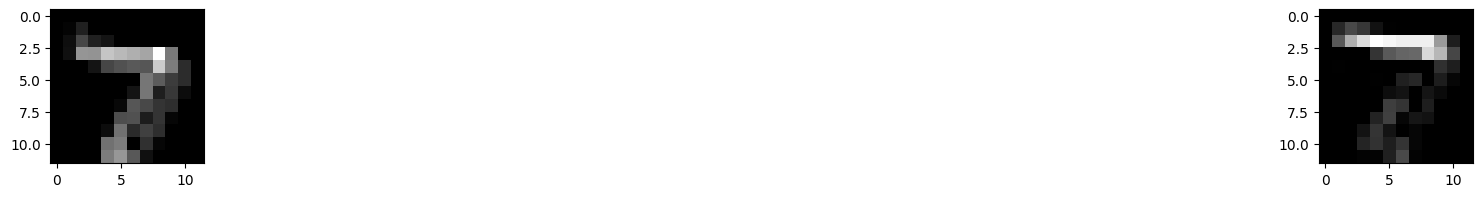

In [ ]:
array_out =[]

for i in range(2):
    array_out.append(open(f"./simulation/maxIxKernelPooling{i}.txt","r"))
klin2 = []
plt.figure(figsize=(30,2))
for ii in range(2):
    k2 = array_out[ii].readlines()
    m2=[]
    for i in k2:
        m2.append(list(map(concat,i.split())))
    plt.subplot(1,2,ii+1)
    plt.imshow(m2,cmap="gray")
# plt.imshow(m2)

for i in range(2):
    array_out[i].close()


In [ ]:
m2

[[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [27], [47], [36], [12], [1], [0], [0], [0], [0], [0], [0]],
 [[0],
  [58],
  [114],
  [144],
  [167],
  [161],
  [156],
  [156],
  [156],
  [101],
  [19],
  [0]],
 [[0], [0], [0], [0], [35], [59], [66], [68], [141], [120], [46], [0]],
 [[0], [1], [0], [0], [0], [0], [0], [0], [0], [32], [20], [0]],
 [[0], [0], [0], [0], [1], [0], [22], [26], [0], [19], [4], [0]],
 [[0], [0], [0], [0], [0], [9], [13], [0], [14], [7], [0], [0]],
 [[0], [0], [0], [0], [0], [41], [34], [0], [20], [0], [0], [0]],
 [[0], [0], [0], [0], [23], [42], [4], [15], [12], [0], [0], [0]],
 [[0], [0], [0], [13], [34], [13], [0], [4], [0], [0], [0], [0]],
 [[0], [0], [0], [24], [33], [20], [34], [4], [0], [0], [0], [0]],
 [[0], [0], [0], [2], [2], [21], [48], [2], [0], [0], [0], [0]]]

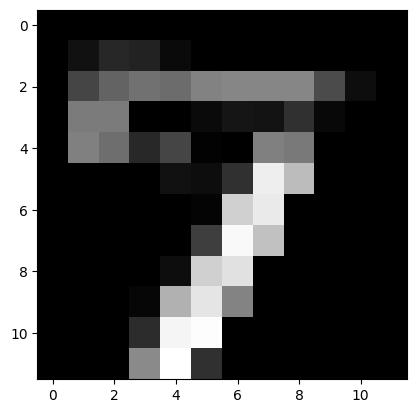

In [ ]:
out2 = open("./simulation/maxIxKernelPooling4.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat,i.split())))
plt.imshow(m2,cmap="gray")


In [ ]:
array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

NameError: name 'm1' is not defined

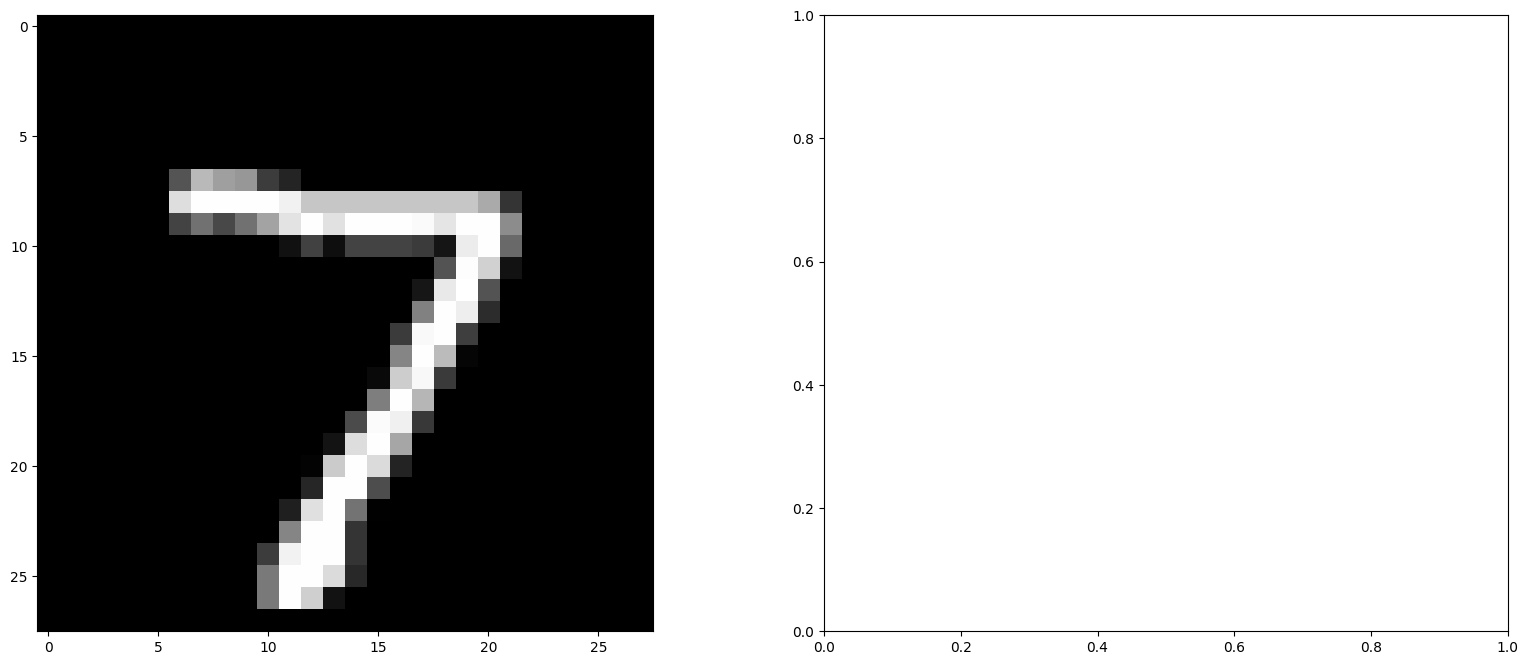

In [ ]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(m1,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(m2,cmap="gray")
plt.show()


In [ ]:
m2

[[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [8], [18], [16], [5], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [32], [46], [53], [50], [60], [62], [62], [62], [35], [6], [0]],
 [[0], [57], [57], [0], [0], [5], [10], [9], [23], [4], [0], [0]],
 [[0], [59], [51], [19], [32], [1], [0], [59], [56], [0], [0], [0]],
 [[0], [0], [0], [0], [8], [6], [23], [110], [87], [0], [0], [0]],
 [[0], [0], [0], [0], [0], [2], [96], [108], [0], [0], [0], [0]],
 [[0], [0], [0], [0], [0], [29], [115], [89], [0], [0], [0], [0]],
 [[0], [0], [0], [0], [6], [96], [104], [0], [0], [0], [0], [0]],
 [[0], [0], [0], [3], [82], [106], [61], [0], [0], [0], [0], [0]],
 [[0], [0], [0], [21], [113], [117], [0], [0], [0], [0], [0], [0]],
 [[0], [0], [0], [64], [118], [23], [0], [0], [0], [0], [0], [0]]]

In [ ]:
plt.imsave("7.png",array,cmap="gray")

In [ ]:
plt.imsave()

In [ ]:
img.save_img("./images/preprocessamento.jpg",array)


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (28, 28)

In [ ]:
os.system("rm ./images/preprocessamento.jpg")
os.system("rm ./images/posprocessamento.jpg")

img.save_img("./images/preprocessamento.jpg",array)
img.save_img("./images/posprocessamento.jpg",m1)
img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


rm: cannot remove './images/preprocessamento.jpg': No such file or directory
rm: cannot remove './images/posprocessamento.jpg': No such file or directory


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (28, 28)

In [ ]:
dens = open("simulation/dense.txt")
klin2 = []
m2=[]
k2 = dens.readlines()
for i in k2:
    m2.append(list(map(concat,i.split()))[0][0])
m2 = np.array(m2)
print(np.array(m2))

[ -51936738   -4843792  -32957726   -5841077  -65187315  -22737449
  -55283783 -111268025   -1164540  -37874797]


hex(1)